In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# IMG_NAME = 'digit.jpg'
IMG_NAME = 'ocr.png'

In [3]:
img = cv2.imread(IMG_NAME)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

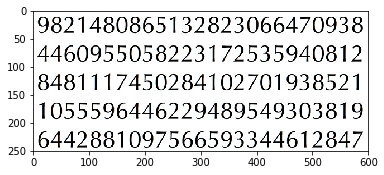

In [4]:
plt.imshow(img)

In [5]:
blur = cv2.GaussianBlur(gray,(5,5),0)
# thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
ret,thresh = cv2.threshold(gray,128,255,1)

In [6]:
# plt.imshow(blurred)

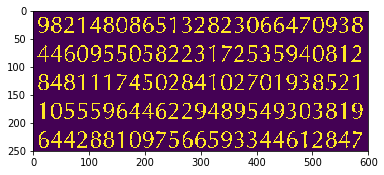

In [7]:
plt.imshow(thresh)

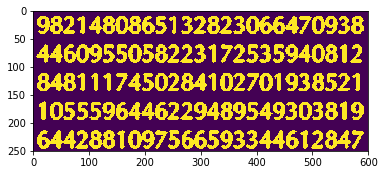

In [8]:
## 对二值图像执行膨胀操作
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))     
dilated = cv2.dilate(thresh,kernel)

plt.imshow(dilated)

In [9]:
## 轮廓提取，cv2.RETR_TREE表示建立层级结构
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

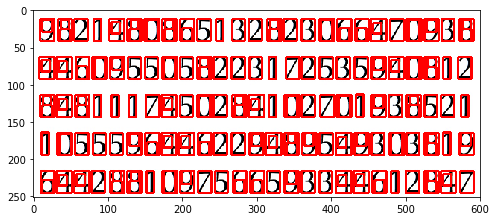

In [10]:
res_img = cv2.imread(IMG_NAME)

for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)
        
        cv2.rectangle(res_img,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.figure(figsize=(8, 8))
plt.imshow(res_img)

In [11]:
# 提取shu zi suo zai de lun kuo，其父轮廓都为-1号轮廓
boxes = []
for i in range(len(hierarchy[0])):
    # 其父轮廓都为-1号轮廓
    if hierarchy[0][i][3] == -1:
        boxes.append(contours[i])

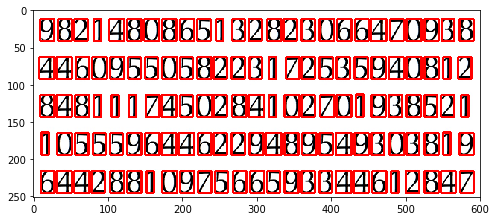

In [12]:
res_img = cv2.imread(IMG_NAME)

for cnt in boxes:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)
        
        cv2.rectangle(res_img,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.figure(figsize=(8, 8))
plt.imshow(res_img)

In [13]:
import cv2
import matplotlib.pyplot as plt


def char_segment(image, figsize=(8, 8), pad = 5):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    ret,thresh = cv2.threshold(gray,128,255,1)
    
    # find contours
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    # extract contours whose root contour's hierarchy is -1
    boxes = []
    for i in range(len(hierarchy[0])):
        # root contour's hierarchy is -1
        if hierarchy[0][i][3] == -1:
            boxes.append(contours[i])
            
    digit_imgs = []
    for cnt in boxes:
        if cv2.contourArea(cnt)>50:
            [x,y,w,h] = cv2.boundingRect(cnt)
            
            digit_imgs.append(img[y-pad:y+h+pad, x-pad:x+w+pad, :].copy())
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            

    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()
    return digit_imgs

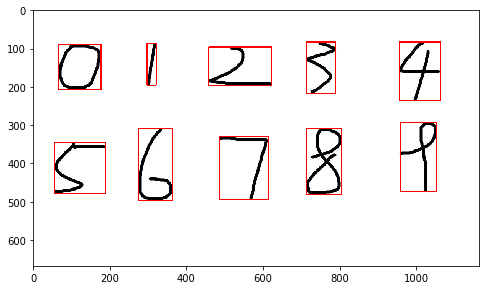

In [14]:
_digits = char_segment('digit.jpg', figsize=(8, 12))

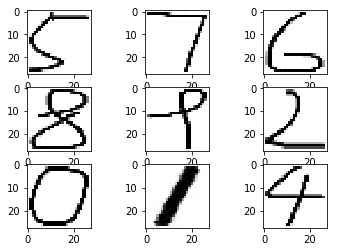

In [15]:
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(cv2.resize(_digits[i], (28, 28)))

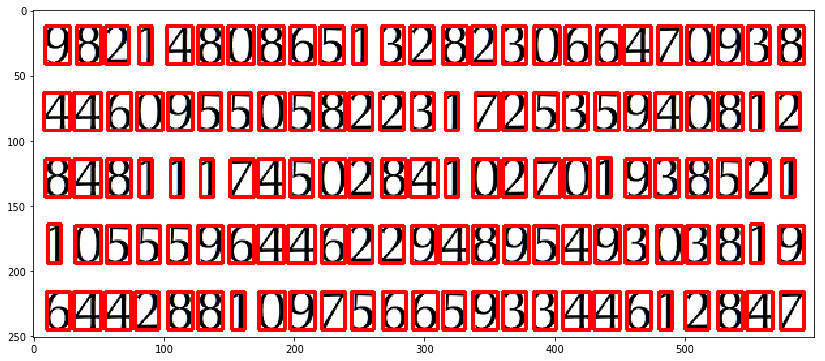

In [16]:
_many_digits = char_segment('ocr.png', (14, 14), pad=2)

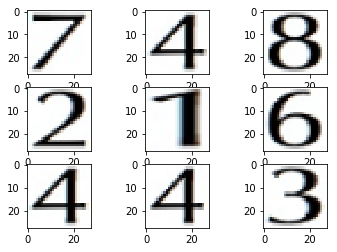

In [17]:
for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(cv2.resize(_many_digits[i], (28, 28)))